## 线段树的定义

TODO

In [1]:
import algviz

class SegmentTreeNode(algviz.BinaryTreeNode):
    def __init__(self, l, r, v, left, right):
        super().__init__(v, left, right)
        self.l = l
        self.r = r

    def __str__(self):
        return '{}\n[{},{}]'.format(self.val, self.l, self.r)

def update_value(node):
    """更新线段树某一节点的值，这里是做区间求和，
       根据需要也可以换成求区间最大/最小值。"""
    val = 0
    if node.left is not None:
        val += node.left.val
    if node.right is not None:
        val += node.right.val
    return val

class SegmentTree:
    def __init__(self, data):
        self.data = data
        self.viz = algviz.Visualizer()
        self.graph = self.viz.createGraph()
        self.root = self.create(0, len(self.data))
        self.graph.addNode(self.root)
        self.viz.display()

    def create(self, l, r):
        if l == r - 1:
            node = SegmentTreeNode(l, r - 1, self.data[l], None, None)
            self.graph.addNode(node)
            self.viz.display()
            return node
        mid = (l + r) // 2
        node = SegmentTreeNode(l, r - 1, None, None, None)
        self.graph.addNode(node)
        self.viz.display()
        if mid > l:
          node.left = self.create(l, mid)
        if mid < r:
          node.right = self.create(mid, r)
        val = 0
        if node.left:
            val += node.left.val
        if node.right:
            val += node.right.val
        node.val = update_value(node)
        return node
    
    def query(self, l, r):
        res = self._query(self.root, l, r)
        self.viz.display()
        self.graph.removeMark(algviz.cRed)
        self.viz.display()
        self.graph.removeMark(algviz.cGreen)
        self.viz.display()
        return res

    def _query(self, node, l, r):
        if l == node.l and r == node.r:
            self.graph.markNode(algviz.cGreen, node, True)
            self.viz.display()
            return node.val
        self.graph.markNode(algviz.cRed, node, True)
        self.viz.display()
        mid = (node.l + node.r) // 2
        if r <= mid:
            return self._query(node.left, l, r)
        elif l > mid:
            return self._query(node.right, l, r)
        else:
            return self._query(node.left, l, mid) + self._query(node.right, mid + 1, r)
        
    def update(self, pos, val):
        self._update(self.root, pos, val)
        self.graph.removeMark(algviz.cBlue)
        self.viz.display()
    
    def _update(self, node, pos, val):
        self.graph.markNode(algviz.cBlue, node, True)
        self.viz.display()
        if pos == node.l and pos == node.r:
            node.val = val
            self.viz.display()
            return
        mid = (node.l + node.r) // 2
        if pos <= mid:
            self._update(node.left, pos, val)
        else:
            self._update(node.right, pos, val)
        node.val = update_value(node)
        self.viz.display()
        

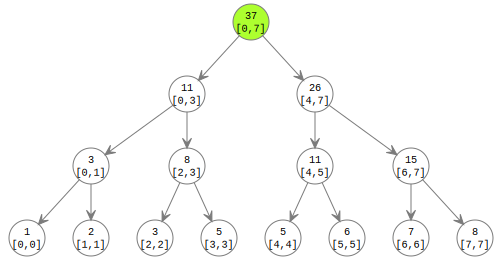

In [2]:
st = SegmentTree([1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
st.query(1, 3)

9

In [4]:
st.update(3, 5)